# Линейные модели в машинном обучении

## Описание проекта 
В компанию обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!
Поэтому он просит модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 
Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- Средний удой за год — не менее 6000 килограммов,
- Молоко должно быть вкусным.

**Цель проекта:**
Разработать две прогнозные модели для отбора буренок в поголовье на основе предоставленных данных о коровах.

**План работы:**
1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Корреляционный анализ
5. Обучение модели линейной регрессии 
6. Обучение модели логистической регресии
7. Общий вывод 

# Этап 1.Загрузка данных 


In [1451]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns
from typing import List
from scipy.stats import shapiro
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix




In [1452]:
try:
    df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal=',')
    df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal=',')
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal=',')
except Exception:
    df_ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';', decimal=',')
    df_ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';', decimal=',')
    df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';', decimal=',')

In [1453]:
#получим данные о датафрейме df_ferma_main
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [1454]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Датафрейм хранит в себеинформацию о 634 коровах. Имеются следующие столбцы

**Параметры корма коровы**

- `ЭКЕ (Энергетическая кормовая единица)` — измерение питательности корма коровы;
- `Сырой протеин` — содержание сырого протеина в корме, в граммах;
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.

**Где паслась корова**

- `Тип пастбища` — ландшафт лугов, на которых паслась корова.

**Особенности коровы**

- `id` — номер коровы;
- `Порода` — порода коровы;
- `Возраст` — бинарный признак (менее_2_лет, более_2_лет);
- `Имя Папы` — порода папы коровы.

**Характеристики молока**

- `Жирность` — содержание жиров в молоке, в процентах;
- `Белок` — содержание белков в молоке, в процентах;
- `Вкус молока` — оценка вкуса по личным критериям фермера;
- `Удой` — масса молока, которую корова даёт в год, в килограммах

In [1455]:
#изучим датафрейм df_ferma_dad
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [1456]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Датафрйем хранит имя папы каждой коровы в стаде фермера

In [1457]:
#изучим информацию о датафрейме df_cow_buy 
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [1458]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


Это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична ferma_main кроме нескольких особенностей:
- Белок и Жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.
- Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. 
- Удой и Вкус молока неизвестны — именно их и предстоит предсказать!



# Этап 2. Предобработка данных 

In [1459]:
#переименуем колонки для удобства
df_ferma_main  = df_ferma_main.rename(columns={'порода папы_быка':'Порода папы быка'})
df_cow_buy = df_cow_buy.rename(columns={"порода папы_быка": "Порода папы быка",
                        "Имя_папы": "Имя Папы",
                        "Текущая_жирность,%": "Жирность,%",
                        "Текущий_уровень_белок,%": "Белок,%"})

In [1460]:
#проверим дубликаты. Если дубликаты есть - удалим их 
data_frame = [df_ferma_main, df_ferma_dad, df_cow_buy]

for data in data_frame:
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
    #создаем словарь, где ключ - название переменной, чтобы название переменной передать в f-строку
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'Количество дубликатов в датафрейме {data_name}: {data.duplicated().sum()}')
    

Количество дубликатов в датафрейме df_ferma_main: 0
Количество дубликатов в датафрейме df_ferma_dad: 0
Количество дубликатов в датафрейме df_cow_buy: 0


In [1461]:
#проверим неявные дублкаты.Если они есть - заменим неявные дубликаты
columns = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']

for column in columns:
    unique_values = df_ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')


Уникальные значения в колонке Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке Тип пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в колонке Порода папы быка: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в колонке Вкус молока: ['вкусно' 'не вкусно']
Уникальные значения в колонке Возраст: ['более_2_лет' 'менее_2_лет']


In [1462]:
#заменим неявные дубликаты
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].replace('Равнинные','Равнинное')
df_ferma_main['Порода папы быка'] = df_ferma_main['Порода папы быка'].replace('Айдиалл','Айдиал')


In [1463]:
#проверим пропуски. Если они есть - изучим. Если нет - пойдем дальше
for data in data_frame:
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'прошущенные значения в {data_name}:\n{data.isnull().sum().sort_values()}')
    print()

прошущенные значения в df_ferma_main:
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
Порода папы быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

прошущенные значения в df_ferma_dad:
id          0
Имя Папы    0
dtype: int64

прошущенные значения в df_cow_buy:
Порода              0
Тип пастбища        0
Порода папы быка    0
Имя Папы            0
Жирность,%          0
Белок,%             0
dtype: int64



In [1464]:
#заменим тип данных там, где это необходимо 
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   Порода папы быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [1465]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [1466]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            16 non-null     object 
 1   Тип пастбища      16 non-null     object 
 2   Порода папы быка  16 non-null     object 
 3   Имя Папы          16 non-null     object 
 4   Жирность,%        16 non-null     float64
 5   Белок,%           16 non-null     float64
dtypes: float64(2), object(4)
memory usage: 896.0+ bytes


## Вывод 
Провели предобработку данных. Переименовали названия некоторых столбцов датафреймов df_ferma_main и df_cow_buy. Проверили наличие дубликатов и пропусков. Также заменили неявные дубликаты. Во всех датафреймах тпы данных корректно отображают информацию о содержании столбцов. Датафреймы готовы для дальнейшего анализа данных. 

# Этап 3. Исследовательский анализ данных

Проведем статистический анализ всех данных

In [1467]:
df_ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
"Удой, кг",629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
СПО (Сахаро-протеиновое соотношение),629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
"Жирность,%",629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
"Белок,%",629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [1468]:
df_cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
"Жирность,%",16.0,3.571875,0.141620,3.340,3.4150,3.5850,3.69250,3.770
"Белок,%",16.0,3.068250,0.011264,3.046,3.0595,3.0735,3.07675,3.081


Построим графики, которые описывают все признаки

In [1469]:
def create_histogram(data, column, title, bins=50):
    """
    Input:
    - data: Датафрейм, содержащий данные.
    - column: Наименование столбца, для которого нужно построить гистограмму.
    - title: Заголовок гистограммы.
    - bins: Количество бинов для гистограммы (по умолчанию 50)

     Output:
    - None

     Description:
    Функция создает гистограмму для указанного столбца в датафрейме при помощи библиотеки seaborn. 
    Результат выводится на экран.
      """
    plt.figure(figsize=(12, 6))
    sns.set()
    sns.histplot(data=data, x=column, kde=True, bins=bins)
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()


In [1470]:
def create_barplot(data, column, tittle):
    """
    Input:
    - data (DataFrame): Исходный DataFrame с данными.
    - column (str): Название колонки, для которой нужно построить диаграмму.
    - title (str): Заголовок для столбчатой диаграммы.
    
    Output:
    None

    Description:
    Функция создает столбчатую диаграмму на основе данных из указанной колонки.
    """
    plt.figure(figsize=(10, 6))
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title(tittle)
    plt.xlabel(f'{column}')
    plt.ylabel(f'количество {column}')

Проанализируем удой 

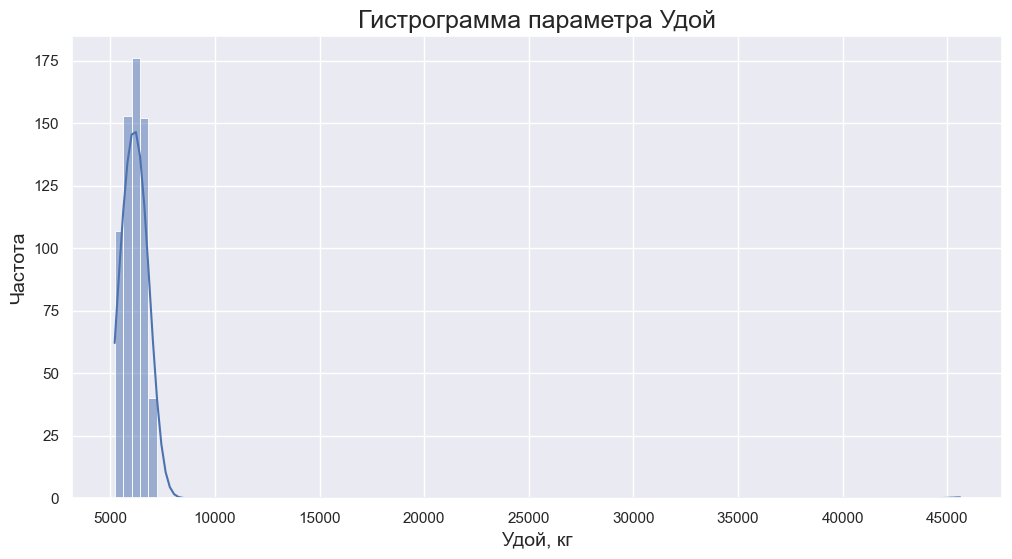

In [1471]:
create_histogram(df_ferma_main, 'Удой, кг', 'Гистрограмма параметра Удой', 100)

В данных видно выброс, скорее всего коров, которые дают больше 10000 кг молока в год нет и при загрузке данных была допущена ошибка в 1 нуле. Поэтому удалим этот выброс

In [1473]:
df_ferma_main = df_ferma_main[df_ferma_main['Удой, кг'] <= 10000]


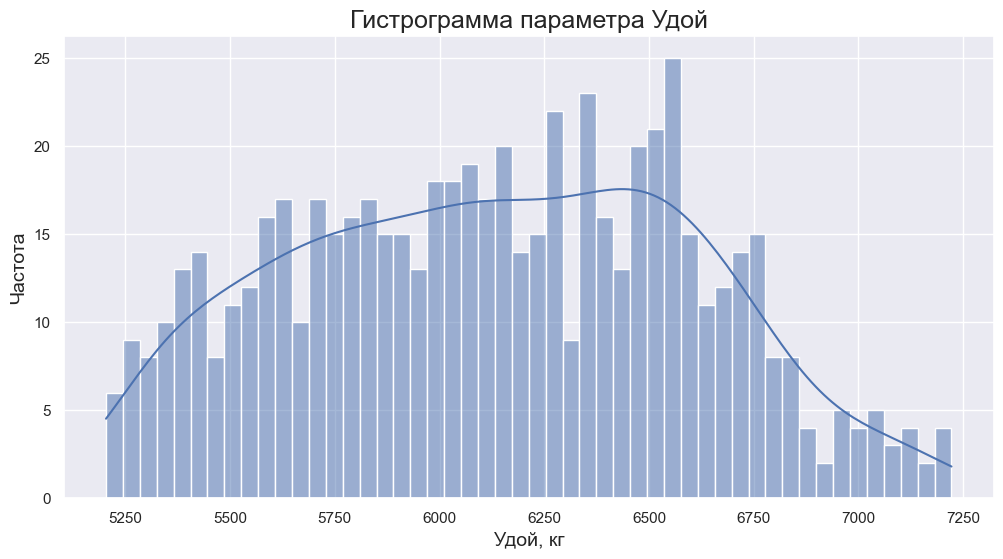

In [1474]:
create_histogram(df_ferma_main, 'Удой, кг', 'Гистрограмма параметра Удой')

Посмотрим на параметр ЭКЕ

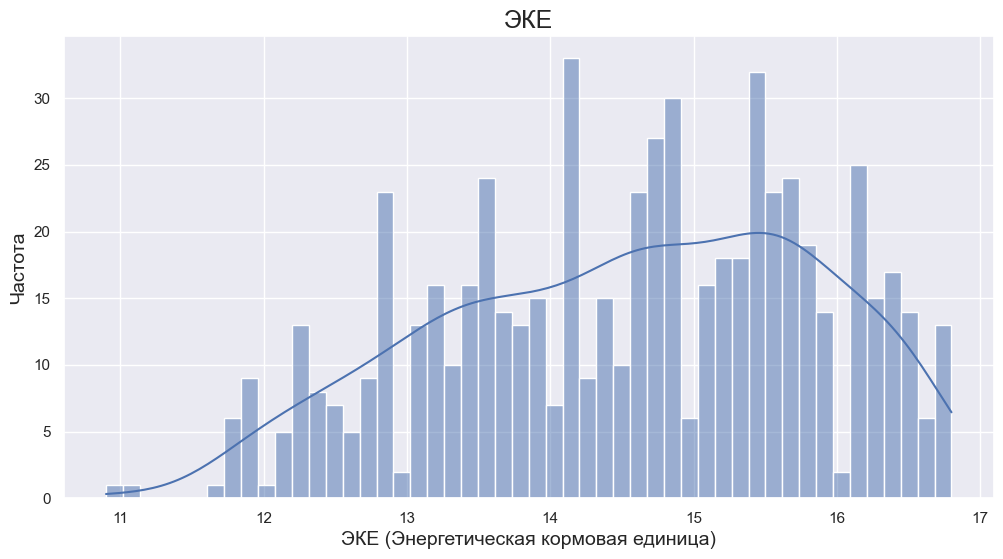

In [1399]:
create_histogram(df_ferma_main, 'ЭКЕ (Энергетическая кормовая единица)', 'ЭКЕ')

В параметрах ЭКЕ нет нормального распределения. Скорее всего это связано с тем, что параметры корма стандартизированы. Поэтому пики на гистограмме нормальны и не требуют дополнительной корректировки

Изучим параметрн сырого протеина

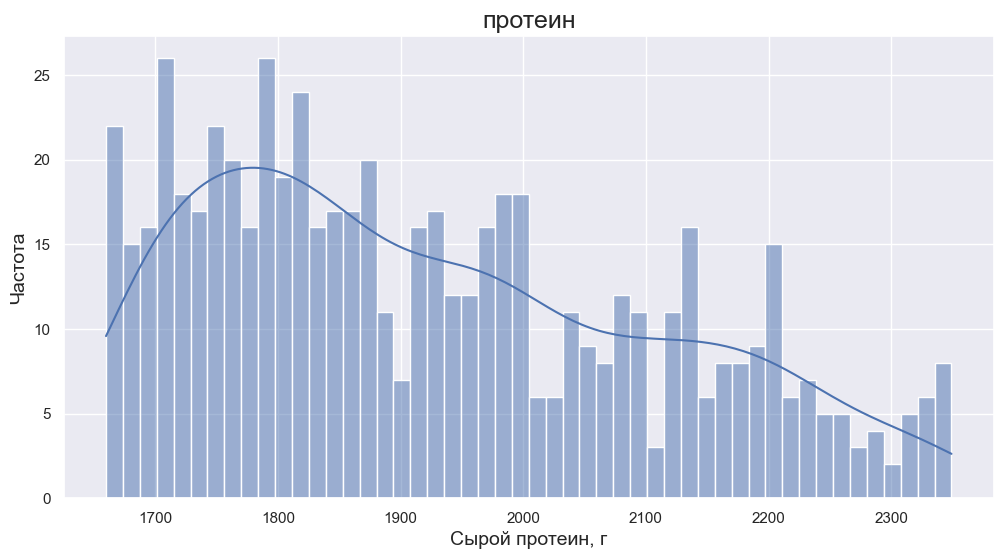

In [1400]:
create_histogram(df_ferma_main, 'Сырой протеин, г', 'протеин')

Гистограмма имеет тенденцию к уменьшению, при этом наблюдаются пики. Такая скошенность может быть обусловлена тем, что большее содержание белка в корме более полезно для здоровья коровы и производства молока. Поэтому большую часть коров кормят кормом с большим количеством белка. 

Проверим параметр СПО

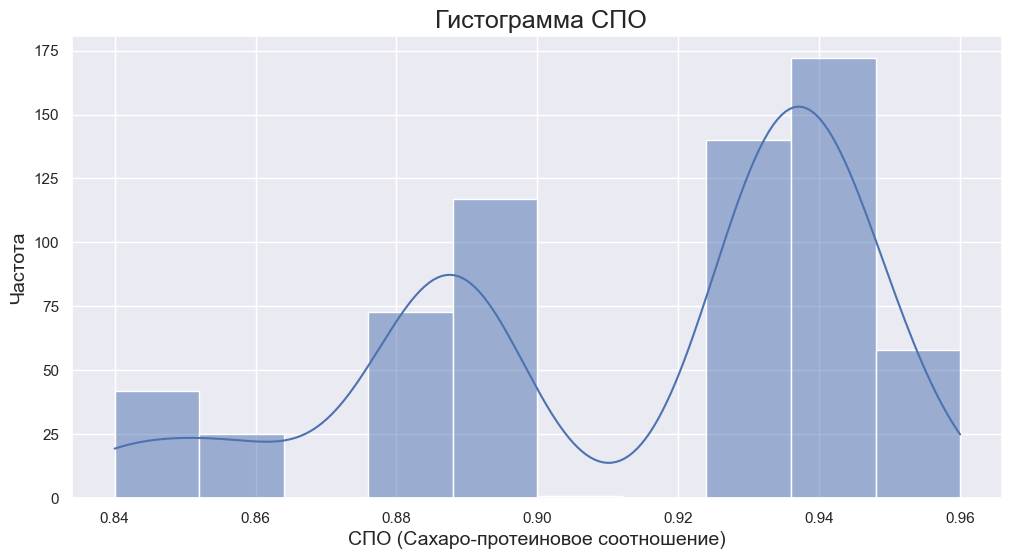

In [1477]:
create_histogram(df_ferma_main, 'СПО (Сахаро-протеиновое соотношение)', ' Гистограмма СПО', 10)

В СПО наблюдаются 3 пика. Каждый следующий пик больше предыдущего. Тем не менее на третьем пике также наблюдается резкое снижение частоты. Скорее всего это связано со стандартизацией на производстве корма. 

Посмотрим тип пастбища

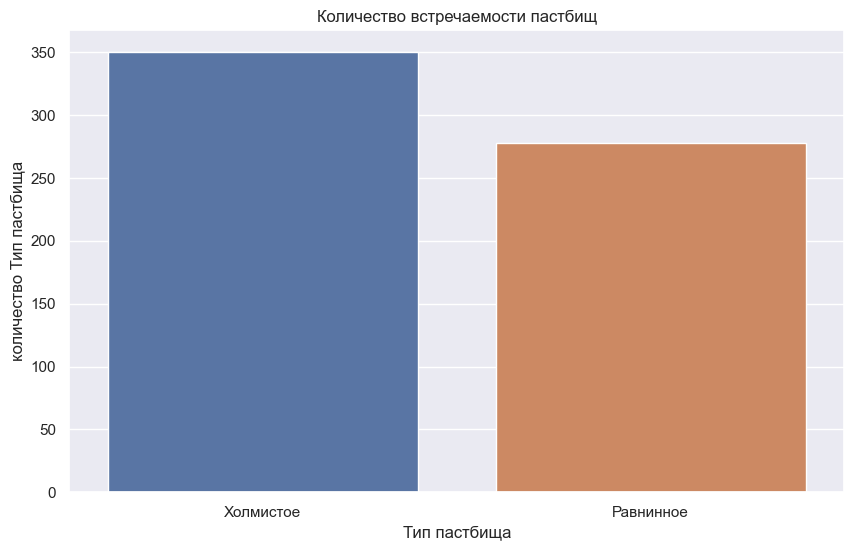

In [1478]:
create_barplot(df_ferma_main, 'Тип пастбища', 'Количество встречаемости пастбищ')

Больше всего коров выгуливается на холмистом пастбище

Изучим породу папы быка 

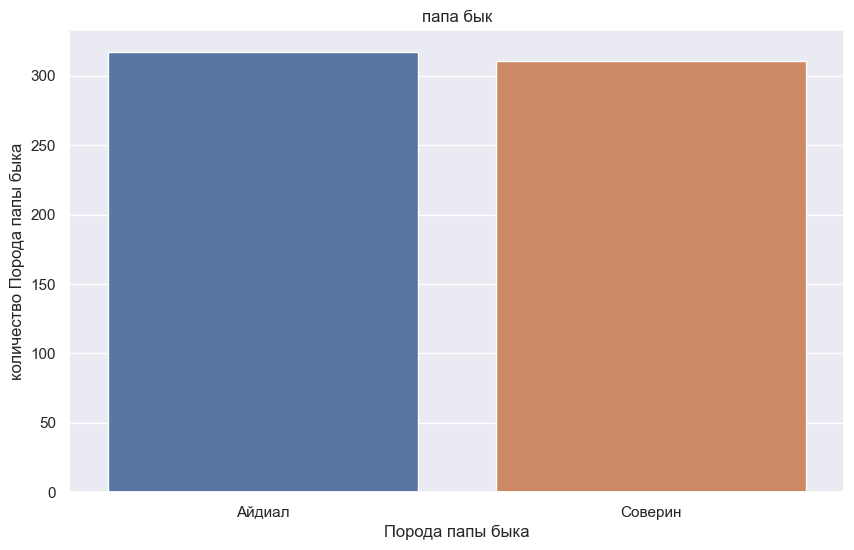

In [1403]:
create_barplot(df_ferma_main, 'Порода папы быка', 'папа бык')

Айдиалов и Соверинов примерно одинаковое количество, однако буренок, у которых папа бык Айдиал немного больше.

Изучим жирность молока 

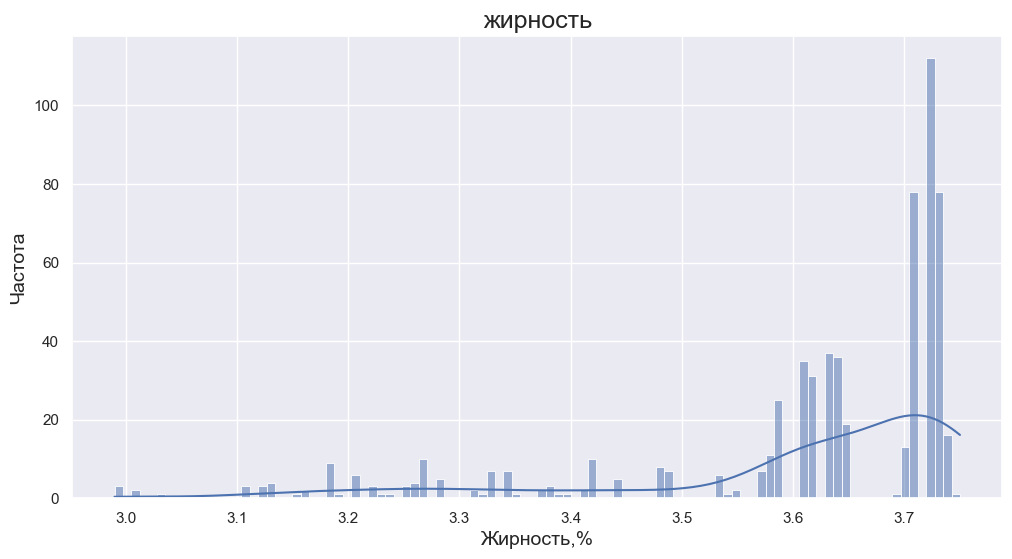

In [1480]:
create_histogram(df_ferma_main, 'Жирность,%', 'жирность', 100)

В гистограмме наблюдается постепенное увеленчие с 3% до 3.5% жирности и после наблюдается снижение

Изучим процентное содержание белка 

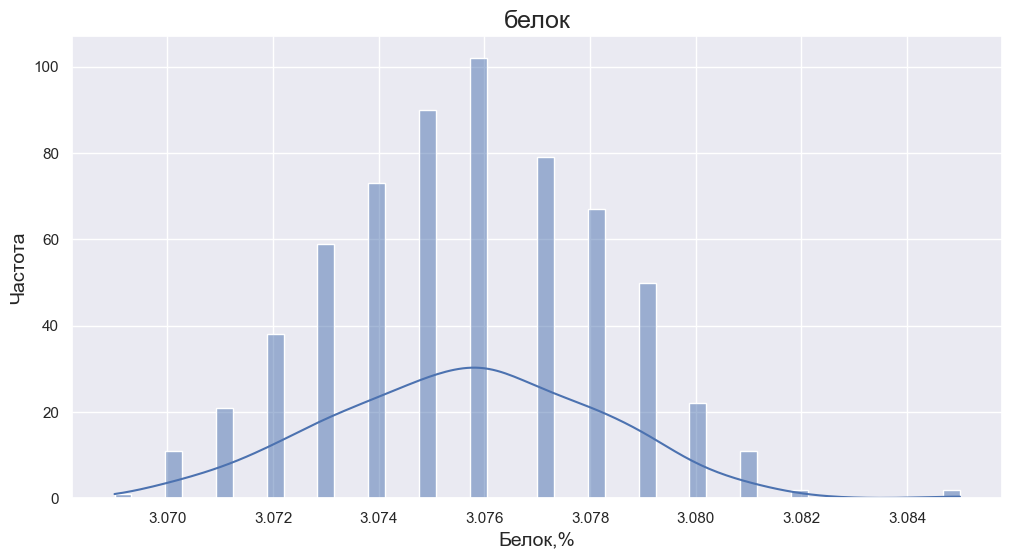

In [1405]:
create_histogram(df_ferma_main, 'Белок,%', 'белок')

В гистограмме наблюдается колокол, при этом есть большие пропуски

Изучим вкус молока

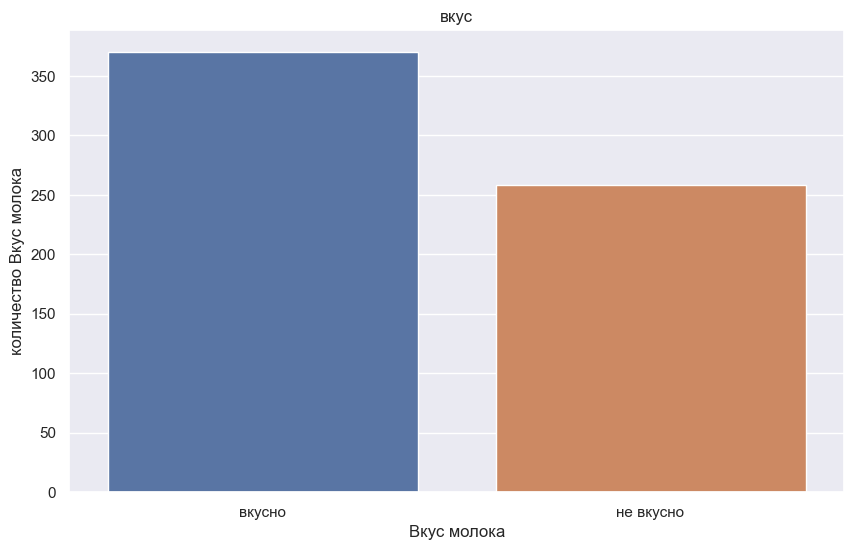

In [1406]:
create_barplot(df_ferma_main, 'Вкус молока', 'вкус')

По графику видно, что больше всего коров дают вкусное молоко

Изучим возраст 

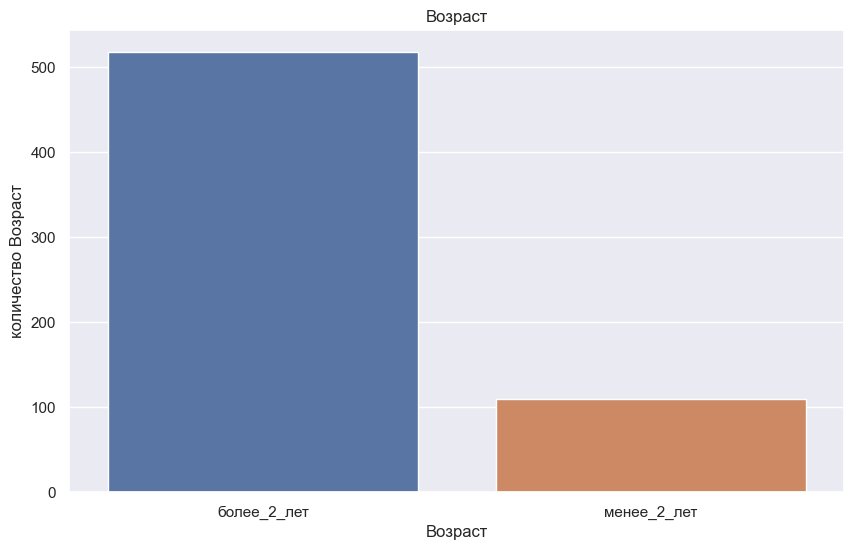

In [1407]:
create_barplot(df_ferma_main, 'Возраст', 'Возраст')

Больше всего коров старше 2х лет

Изучим породу буренок

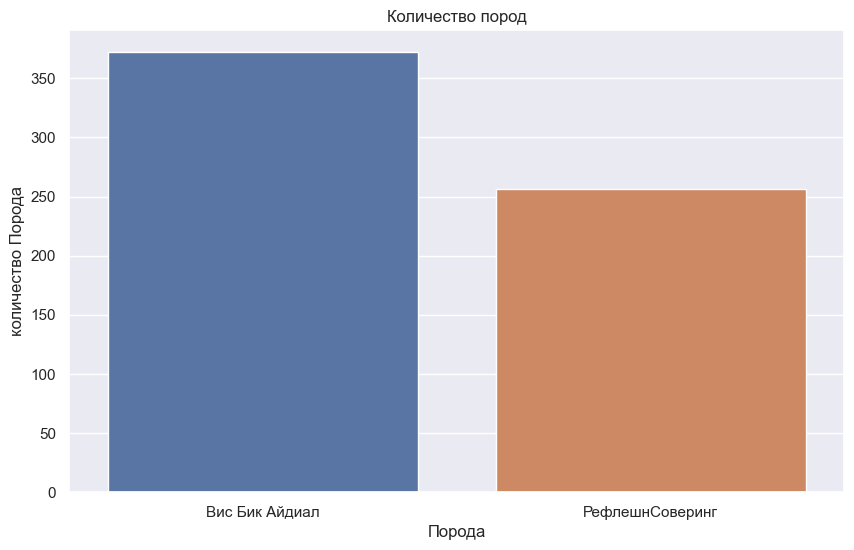

In [1408]:
create_barplot(df_ferma_main, 'Порода', 'Количество пород')

Больше весго буренок с породой Вис Бик Айдиал

Изучим имя папы

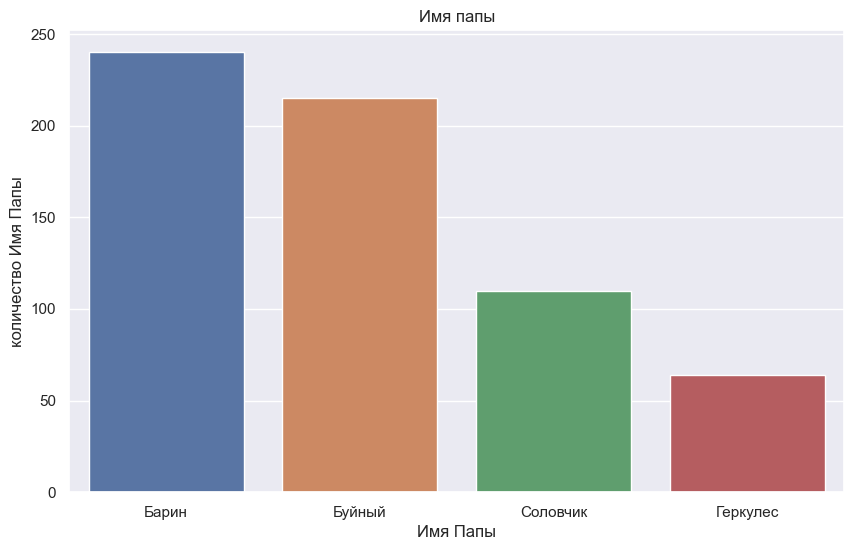

In [1409]:
create_barplot(df_ferma_dad, 'Имя Папы', 'Имя папы')

Больше всего буренок с папой по имени Барин, а меньше всего Геркулес

Изучим датафрйем df_cow_buy

Изучим породы, которые потенциально может купить фермер

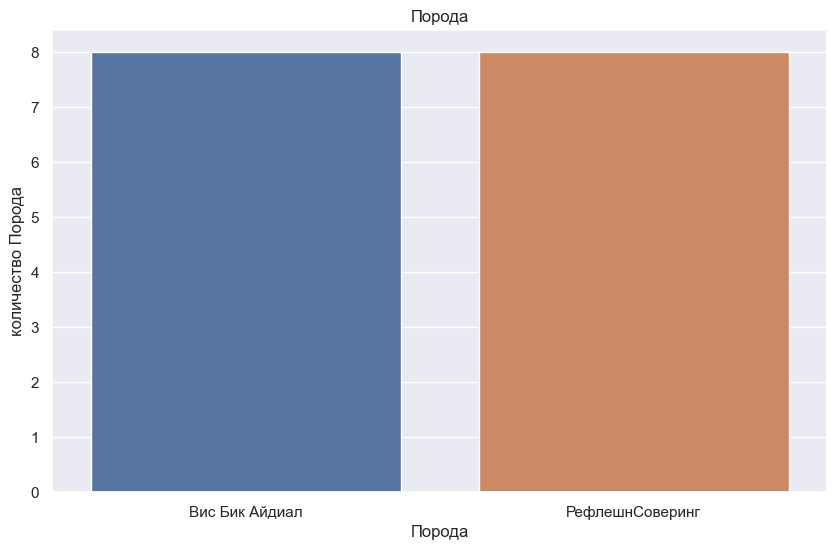

In [1410]:
create_barplot(df_cow_buy, 'Порода', 'Порода')

Количество буренок породы Вис Бик Айдиал и РефлешнСоверинг одинаковое 

Изучим тип пастбища 

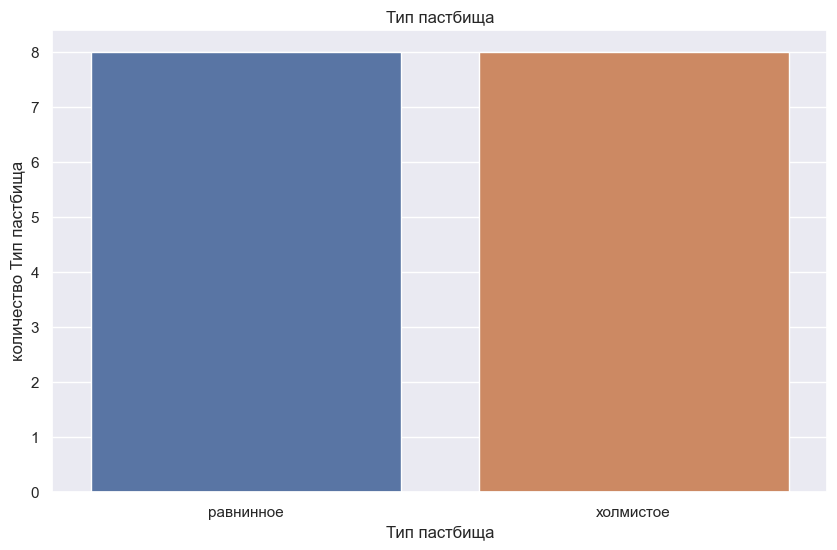

In [1411]:
create_barplot(df_cow_buy, 'Тип пастбища', 'Тип пастбища')

Одинаковое количество буренок выгуливаются на равнинном и холмистом поле 

Изучим породу папы быка 

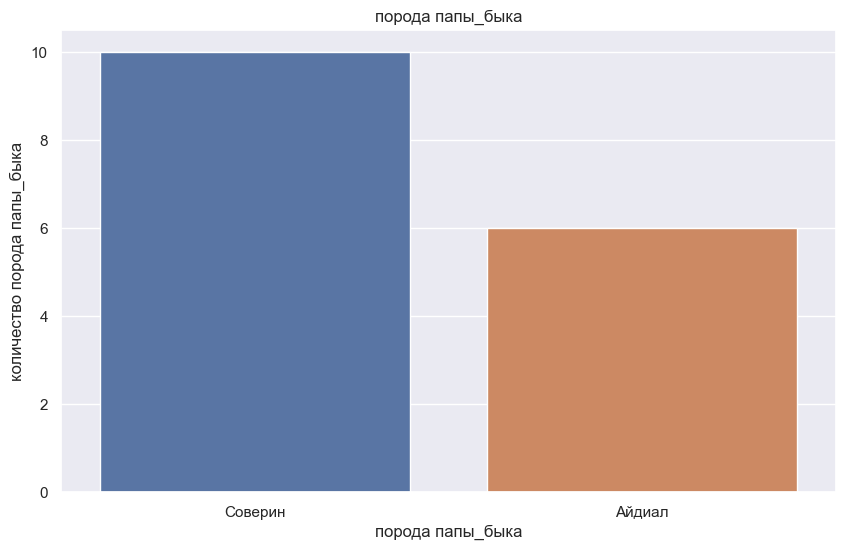

In [1412]:
create_barplot(df_cow_buy, 'порода папы_быка', 'порода папы_быка')

Больше всего буренок у которых папа бык Соверин

Изучим имена пап 

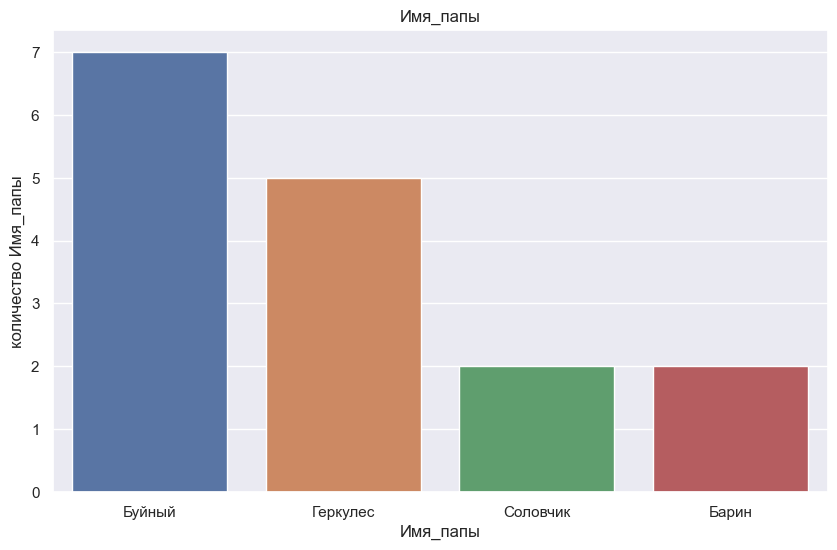

In [1413]:
create_barplot(df_cow_buy, 'Имя_папы', 'Имя_папы')

Больше всего буренок на продажу, у которых пап бык по кличке Буйный, а меньше всего по кличке Барин. 

Изучим жирность молока 

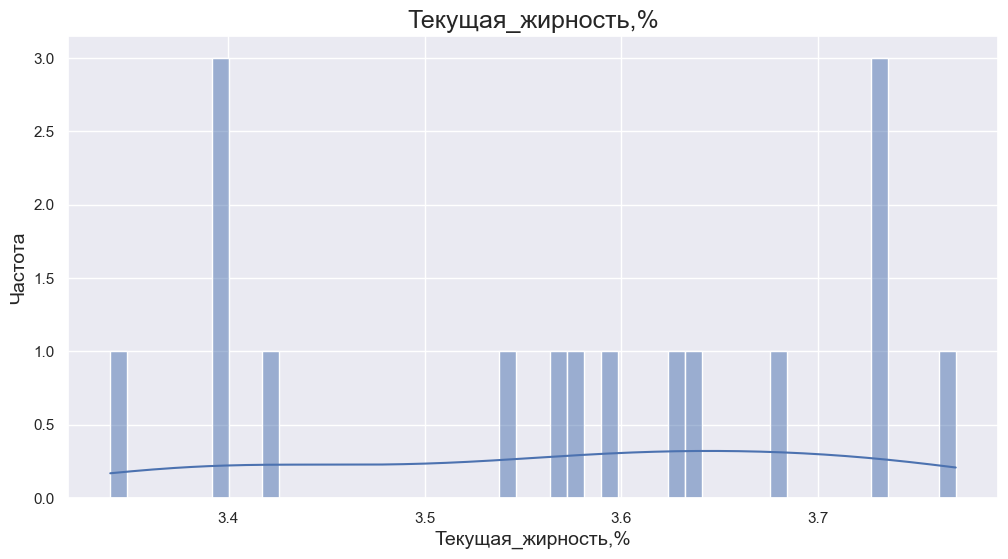

In [1414]:
create_histogram(df_cow_buy, 'Жирность,%', 'Текущая_жирность,%')

В гистограмме видно большой разброс и неравномерное распределение. Имеется большой пробел между жирность 3.4% и 3.6%

Изучим уровень белка 

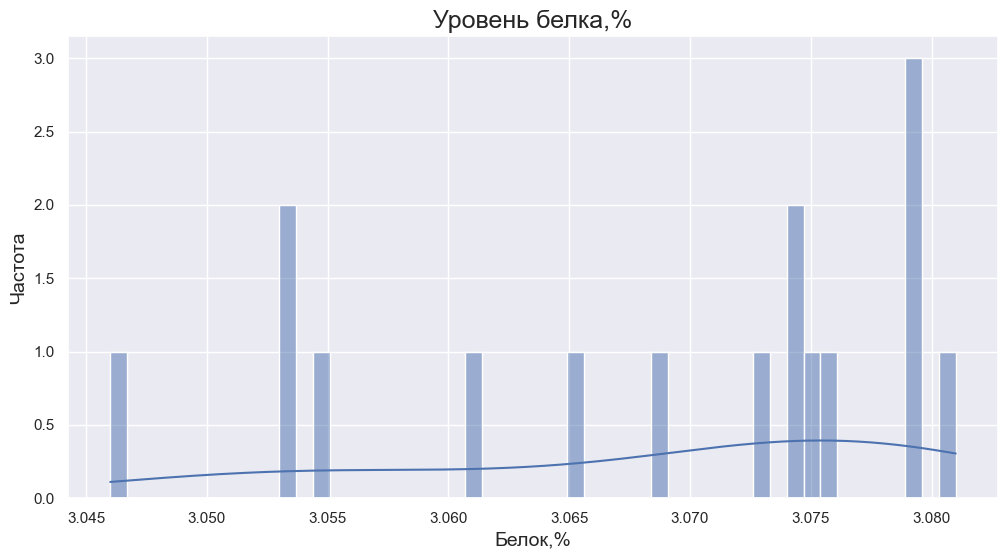

In [1481]:
create_histogram(df_cow_buy, 'Белок,%', 'Уровень белка,%')

Количества белка так же распределено не равномерно, но выбросов не наблюдлается 

## Вывод 
Провели анализ данных. Были удалены выбросы в столбце Удой. В остальных параметрах не было обнаружено выбросов или каких-то аномалий, которые требуют дополнительных действий. 

# Этап 4. Корреляция

Перед тем как провести корреляционный анализ категориальных данных - проверим нормальное ли распределение 

In [1417]:
columns_for_corr = ['ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
       'Жирность,%', 'Белок,%']

In [1419]:
def shapiro_test(data, column):
    """
    Функция выполняет тест Шапиро-Уилка на нормальность данных в указанном столбце.

    Параметры:
        - data: pandas DataFrame, входные данные
        - column: str, название столбца, для которого выполняется тест

    Вывод:
        - печать результата теста Шапиро-Уилка, включая статистику теста и p-значение
        - вывод сообщения о том, является ли распределение данных нормальным
    """ 
    statistic, p_value = shapiro(data[column])

    # Печать результата теста
    alpha = 0.05  # Уровень значимости
    print(f'Результат теста Шапиро-Уилка для столбца {column}:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}')
    if p_value > alpha:
        print('Распределение данных является нормальным.')
    else:
        print('Распределение данных не является нормальным.')
    

In [1420]:
shapiro_test(df_ferma_main, 'Удой, кг')

Результат теста Шапиро-Уилка для столбца Удой, кг:
Статистика теста: 0.9813497066497803
p-значение: 3.5405690823608893e-07
Распределение данных не является нормальным.


In [1421]:
for col_name in columns_for_corr:
    shapiro_test(df_ferma_main, col_name)
    print()

Результат теста Шапиро-Уилка для столбца ЭКЕ (Энергетическая кормовая единица):
Статистика теста: 0.9713218212127686
p-значение: 9.629514963194197e-10
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Сырой протеин, г:
Статистика теста: 0.9437043070793152
p-значение: 1.0714618652225578e-14
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца СПО (Сахаро-протеиновое соотношение):
Статистика теста: 0.85552579164505
p-значение: 1.5361221772382798e-23
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Жирность,%:
Статистика теста: 0.7418994307518005
p-значение: 4.189550639664007e-30
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Белок,%:
Статистика теста: 0.9831568002700806
p-значение: 1.22859341900039e-06
Распределение данных не является нормальным.



Поскольку все параметрны имеют не нормальное распределение для подсчета корреляции делаем метод Спирмана. 

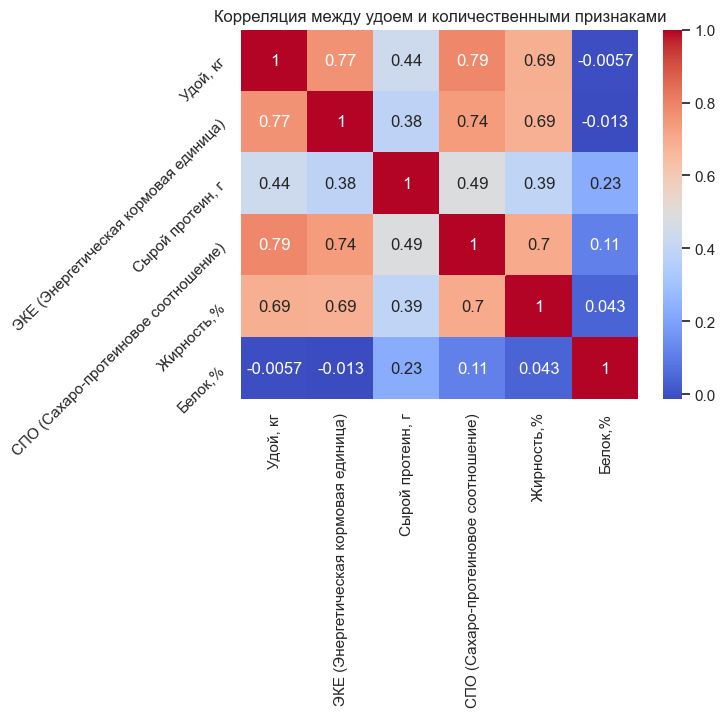

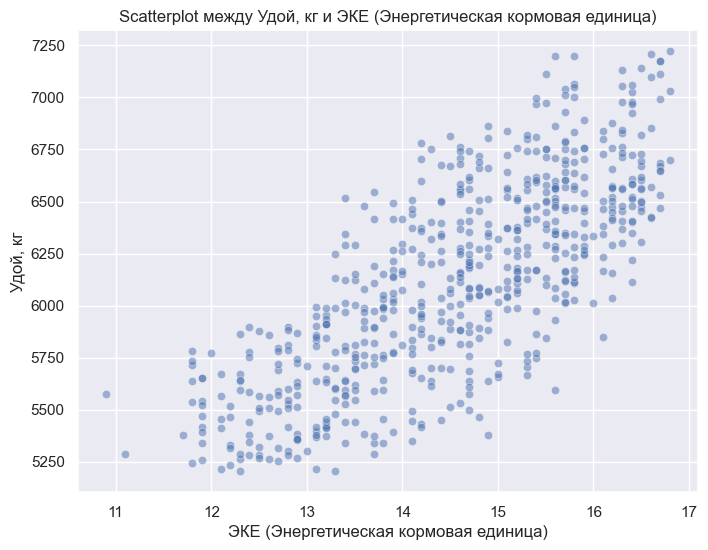

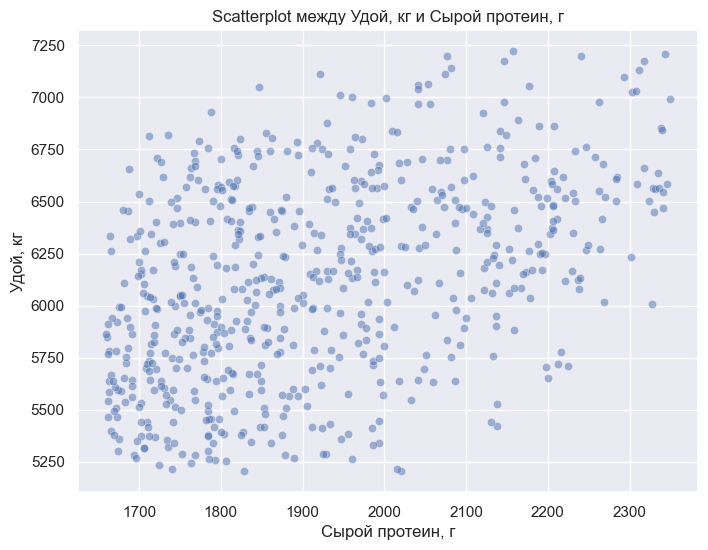

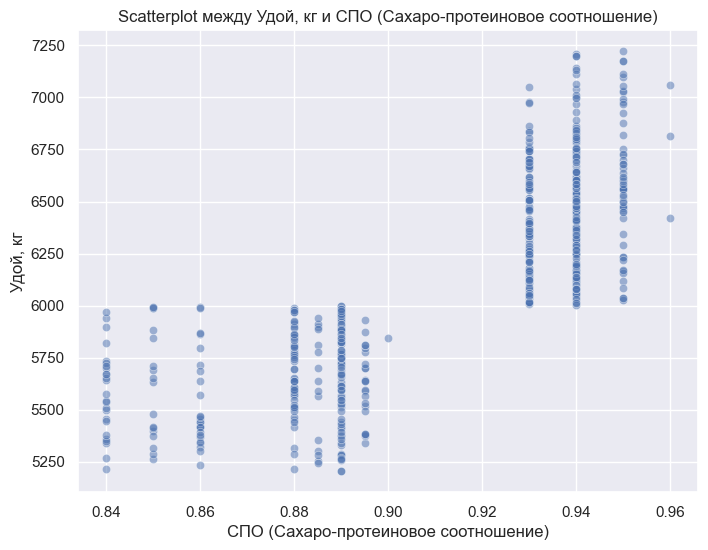

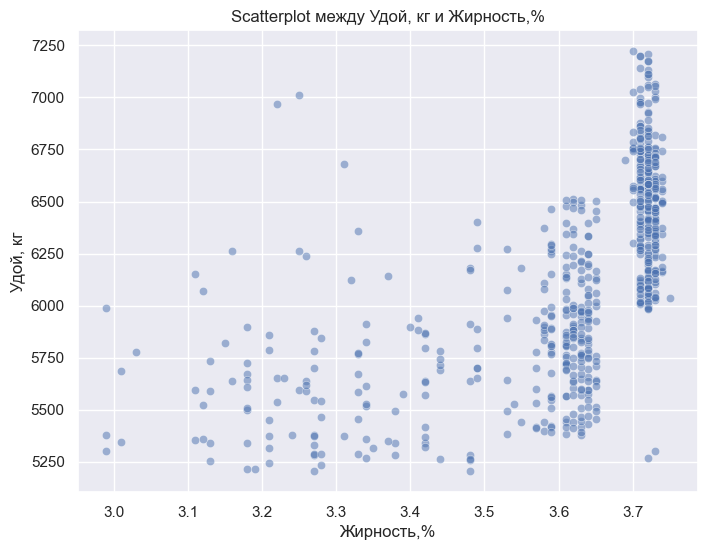

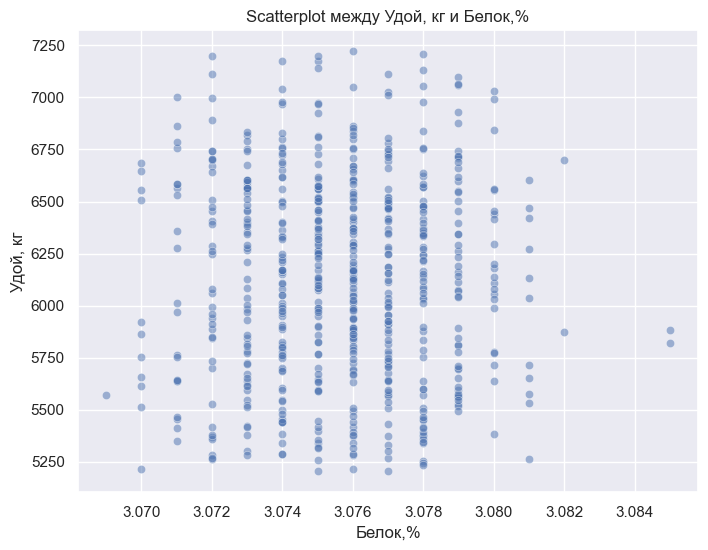

In [1424]:
def calculate_correlation(df, target_column, columns_for_corr, method='spearman'):
    """
    input: df - датафрейм со значениями
           target_column - название целевого признака (столбца)
           columns_for_corr - список с названиями количественных признаков
           method - метод подсчета корреляции: 'spearman' (по умолчанию) или 'kendall'
    output: None
    description: Функция выполняет подсчет корреляции между целевым признаком
                 и количественными признаками с использованием заданного метода 
                 и строит тепловую карту.
    """
    corr_matrix = df[[target_column] + columns_for_corr].corr(method=method)
    
    # Построение тепловой карты
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.yticks(rotation=45)
    plt.title(f'Корреляция между удоем и количественными признаками')
    plt.show()

    for column in columns_for_corr:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column, y=target_column, alpha=0.5)
        plt.title(f'Диаграмма рассеяния между {target_column} и {column}')
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.show()


    

# Вызов функции с примерными данными

calculate_correlation(df_ferma_main, 'Удой, кг', columns_for_corr, method='spearman')

- Между белком, жирностью и удоем не наблюдается сильной корреляции и линейной зависимости. Это связано с тем, что это параметры молока. 
- Между сырым протеином и удоем прослеживается линейная зависимость, хоть и не очень сильная. Между сырым протеином и удоем корреляцияне такая сильная - 0.44, 
- Между СПО и удоем нет линейной связи, а уровень корреляции сильный 0.79 
- Между ЭКЕ и удоем нет линейной зависимости, на графике прослеживается парабола. Уровень корреляции сильный 0.77 

**Вывод**
Требуется некоторая корректировка параметров ЭКЕ и СПО. Параметр Сырой протеин не требует дополнительных расчетов для использования в линейной регрессии. 

# Этап 5. Линейная регрессия 

Необходимо построить и обучить модель линейной регресии для предсказания удоя буренок. 
Для этого будем использовать следующие параметры: ЭКЕ, СПО и сырой протеин. Поскольку это параметры корма. Скорее всего питательноть и сбалансированность корма будет влиять на то, сколько корова может приносить молока в год.
Также для обучения и предсказания будет использовать параметры: Возраст, Порода, Тип пастбища, Порода папы быка. Так как эти параметры скорее всего также влияют на удой.

Для удобства напишем функцию линейной регресии 
#### **train_models**

Функция выполняет обучение модели линейной регрессии на данных, предварительно производя подготовку и предобработку признаков.

#### Параметры:
- `df`: *DataFrame* - Исходный DataFrame с данными.
- `columns_to_drop`: *list* - Список имён столбцов, которые следует удалить из обучающих данных.
- `y_name`: *str* - Имя целевого столбца.
- `cat_col_names`: *list* - Список имён категориальных признаков.
- `num_col_names`: *list* - Список имён числовых признаков.
- `random_st`: *int* - Зерно для случайности разделения данных.

#### Возвращает:
- `model_lr`: *LinearRegression* - Обученная модель линейной регрессии.
- `encoder`: *OneHotEncoder* - Обученный кодировщик категориальных признаков.
- `scaler`: *StandardScaler* - Обученный нормализатор числовых признаков.
- `y_test`: *Series* - Целевые значения тестовой выборки.
- `predictions`: *ndarray* - Предсказанные значения для тестовой выборки.
- `residuals`: *Series* - Разница между истинными и предсказанными значениями.

#### Функция выполняет следующие шаги:

1. Инициализирует RANDOM_STATE с помощью значения random_st.

2. Отбрасывает столбцы, указанные в columns_to_drop, из датафрейма df и сохраняет его в переменную X.

3. Сохраняет целевой столбец y из df в переменную y.

4. Разделяет данные на обучающую выборку и тестовую выборку с помощью train_test_split(), используя X, y и RANDOM_STATE. Результаты разделения сохраняются в X_train, X_test, y_train и y_test.

5. Применяет кодировщик категориальных признаков с помощью OneHotEncoder для X_train[cat_col_names] и X_test[cat_col_names]. Закодированные данные сохраняются в X_train_ohe и X_test_ohe.

6. Масштабирует числовые признаки с помощью StandardScaler для X_train[num_col_names] и X_test[num_col_names]. Масштабированные данные сохраняются в X_train_scaled и X_test_scaled.

7. Создает новые датафреймы X_train_ohe и X_test_ohe с закодированными категориальными признаками и именами столбцов encoder_col_names.

8. Создает новые датафреймы X_train_scaled и X_test_scaled с масштабированными числовыми признаками и именами столбцов num_col_names.

9. Объединяет закодированные данные категориальных признаков и масштабированные данные числовых признаков в обучающей и тестовой выборках. Результаты сохраняются в X_train и X_test.

10. Инициализирует модель линейной регрессии (LinearRegression), обучает ее на X_train и y_train с помощью метода fit(). Результаты обучения сохраняются в model_lr.

11. Генерирует предсказания на тестовых данных с помощью метода predict() и сохраняет их в predictions.

12. Вычисляет остатки (разницу между фактическими значениями y_test и предсказаниями predictions) и сохраняет их в residuals.

13. Возвращает модель линейной регрессии model_lr, кодировщик encoder, масштабировщик scaler, фактические значения y_test, предсказания predictions и остатки residuals.



In [1322]:
def train_models(df, columns_to_drop, y_name, cat_col_names, num_col_names, random_st):
    RANDOM_STATE = random_st
    X = df.drop(columns_to_drop, axis=1)
    y = df[y_name]
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE) 

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    print(X_train_ohe)
    encoder_col_names = encoder.get_feature_names()
    print(encoder_col_names)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    residuals =  y_test - predictions

    return model_lr, encoder, scaler, y_test, predictions, residuals

И для удобства напишем функцию для графиков остатков 

#### **graphs_for_residuals(predictions, residuals)**

Функция служит для создания графиков, связанных с остатками модели.

##### Параметры:
- `predictions` (array-like): Массив с предсказанными значениями модели.
- `residuals` (array-like): Массив с остатками модели.

##### Возвращаемое значение:
Отсутствует. Функция выводит графики с использованием библиотеки Matplotlib.

##### Графики:
Функция создает два графика:

1. Гистограмма распределения остатков:
   - На оси x отображаются значения остатков.
   - На оси y отображается количество значений остатков в каждом интервале.
   - Заголовок графика: 'Гистограмма распределения остатков'.
   - Название оси x: 'Остатки'.

2. График анализа дисперсии:
   - На оси x отображаются предсказанные значения модели.
   - На оси y отображаются остатки модели.
   - Заголовок графика: 'Анализ дисперсии'.
   - Название оси x: 'Предсказания модели'.
   - Название оси y: 'Остатки'.


In [1323]:
def graphs_for_residuals(predictions, residuals):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

Первая модель

In [1324]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 
                 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)' ]

model_lr, encoder, scaler, y_test, predictions, residuals = train_models(df_ferma_main, columns_to_drop, 'Удой, кг', 
                                   cat_col_names, num_col_names, 42)


[[0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин']


In [1325]:
r_squared= r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.7844078173416967


R-квадрат (R-squared) - это метрика, которая представляет собой меру объясненной дисперсии модели линейной регрессии. Она показывает, насколько хорошо линейная регрессионная модель соответствует данным.

Значение R-квадрат находится в диапазоне от 0 до 1 и интерпретируется следующим образом:

Значение 0 означает, что модель не объясняет дисперсию целевой переменной и не предсказывает значения лучше, чем просто среднее выборки.
Значение 1 означает, что модель полностью объясняет дисперсию целевой переменной и предсказывает значения с идеальной точностью.
Таким образом, значение R-квадрат в 0.7844078173416967 указывает на то, что наша модель линейной регрессии объясняет около 78.44% дисперсии в данных, что говорит о хорошем соответствии модели данным. Остальные 21.56% дисперсии объясняются другими факторами, которые не учтены моделью.

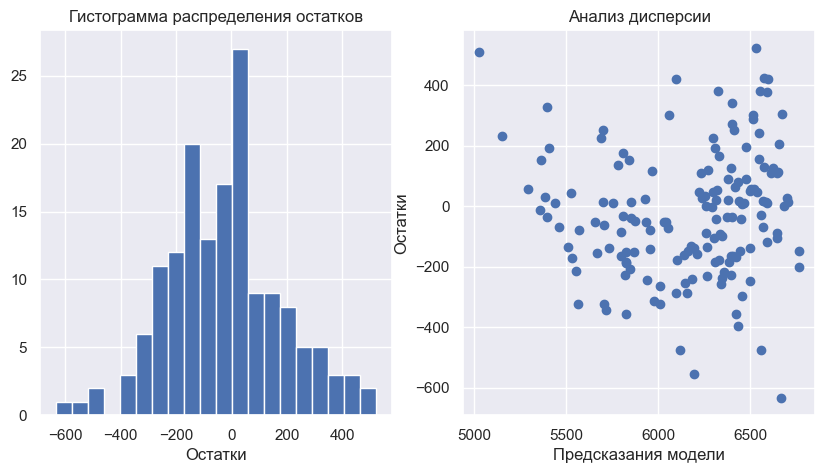

In [1326]:
graphs_for_residuals(predictions, residuals)

Графики остатков не идеальные, но при этом достатчно хорошие. Гистограмма немного смещена влево и есть небольшой выброс в районе -600.  Паттернов в анализе дисперсии не обнаружены. 
Модель хорошая, но есть что улучшать

Вторая модель 

Изменим данные СПО и ЭКЕ 
1. В СПО выбере границу нелинейности 0.91, так как на графике видно условно 2 квадрата, которые как раз можно разделить, если мы сделаем 2 категори: до 0.91 и после 0.91
2. Так как на графике дисперсии в ЭКЕ наблюдалась парабола, то линейную функцию можно сделать путем возведения в квадрат 

In [1328]:
nonlinear_threshold = 0.91 
df_ferma_main['СПО_categorical'] = (df_ferma_main['СПО (Сахаро-протеиновое соотношение)']
                                    .apply(lambda x: '<=_0.91' if x <= nonlinear_threshold else '>_0.91'))
df_ferma_main['ЭКЕ^2'] = df_ferma_main['ЭКЕ (Энергетическая кормовая единица)'] ** 2
warnings.filterwarnings('ignore')

df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО_categorical,ЭКЕ^2
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<=_0.91,201.64
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<=_0.91,163.84
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<=_0.91,196.00
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<=_0.91,153.76
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<=_0.91,163.84


In [1330]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 'СПО (Сахаро-протеиновое соотношение)']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО_categorical']
num_col_names = ['ЭКЕ^2', 'Сырой протеин, г']

model_lr_2, encoder2, scaler2, y_test_2, predictions_2, residuals_2 = train_models(df_ferma_main, columns_to_drop, 
                                                    'Удой, кг', cat_col_names,
                                                      num_col_names, 42)

[[0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин'
 'x4_>_0.91']


In [1331]:
r_squared_2 = r2_score(y_test_2, predictions_2)
print("R-squared:", r_squared_2)

R-squared: 0.8180879926867503


значение R-квадрат в 0.8180879926867503 указывает на то, что наша модель линейной регрессии объясняет около 81.81% дисперсии в данных, что говорит о хорошем соответствии модели данным. Остальные 19% дисперсии объясняются другими факторами, которые не учтены моделью.




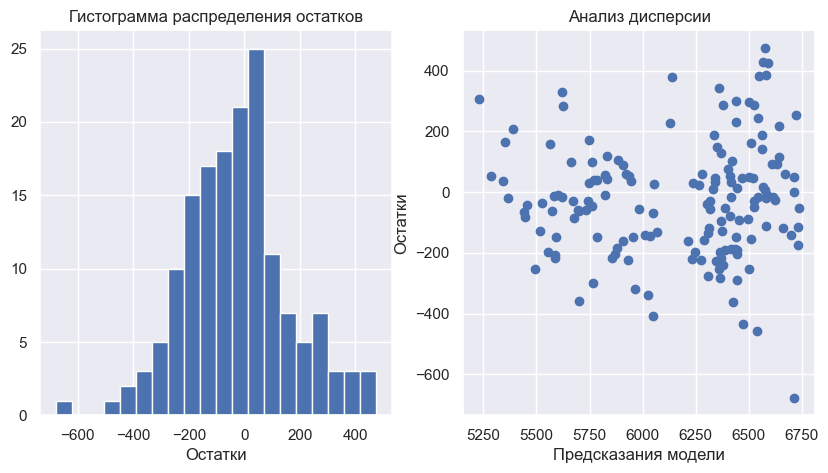

In [1332]:
graphs_for_residuals(predictions_2, residuals_2)

В сравнении с предыдущей моделью на графиках видно улучшение. Выброс в районе -600 на гистограмме стал меньше. Паттернов в анализе дисперсии не обнаружены. 
Модель стала лучше, но возможно есть еще моменты, которые стоит улучшить

Третья модель

In [1333]:
merged_df = pd.merge(df_ferma_main, df_ferma_dad, on='id')

merged_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО_categorical,ЭКЕ^2,Имя Папы
0,1,5863,14.2,1743.0,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<=_0.91,201.64,Буйный
1,2,5529,12.8,2138.0,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<=_0.91,163.84,Соловчик
2,3,5810,14.0,1854.0,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<=_0.91,196.00,Барин
3,4,5895,12.4,2012.0,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<=_0.91,153.76,Буйный
4,5,5302,12.8,1675.0,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<=_0.91,163.84,Барин


In [1334]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     628 non-null    int64  
 1   Удой, кг                               628 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  628 non-null    float64
 3   Сырой протеин, г                       628 non-null    float64
 4   СПО (Сахаро-протеиновое соотношение)   628 non-null    float64
 5   Порода                                 628 non-null    object 
 6   Тип пастбища                           628 non-null    object 
 7   Порода папы быка                       628 non-null    object 
 8   Жирность,%                             628 non-null    float64
 9   Белок,%                                628 non-null    float64
 10  Вкус молока                            628 non-null    object 
 11  Возрас

In [1482]:
merged_df.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
Порода папы быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
СПО_categorical                          0
ЭКЕ^2                                    0
Имя Папы                                 0
dtype: int64

In [1483]:
merged_df.duplicated().sum()

0

Никакие данные при слиянии не потерялись, пропусков нет и дубликатов нет

In [1335]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 
                   'СПО (Сахаро-протеиновое соотношение)']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 
                 'СПО_categorical', 'Имя Папы']
num_col_names = ['ЭКЕ^2', 'Сырой протеин, г']

model_lr_3, encoder3, scaler3, y_test_3, predictions_3, residuals_3 = train_models(merged_df, columns_to_drop, 
                                                    'Удой, кг', cat_col_names, 
                                                    num_col_names, 42)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин'
 'x4_>_0.91' 'x5_Буйный' 'x5_Геркулес' 'x5_Соловчик']


In [1336]:
r_squared_3 = r2_score(y_test_3, predictions_3)
print("R-squared:", r_squared_3)

R-squared: 0.8247542745210406


значение R-квадрат в 0.8247542745210406  указывает на то, что наша модель линейной регрессии объясняет около 82.47% дисперсии в данных, что говорит о хорошем соответствии модели данным. Остальные 18% дисперсии объясняются другими факторами, которые не учтены моделью.

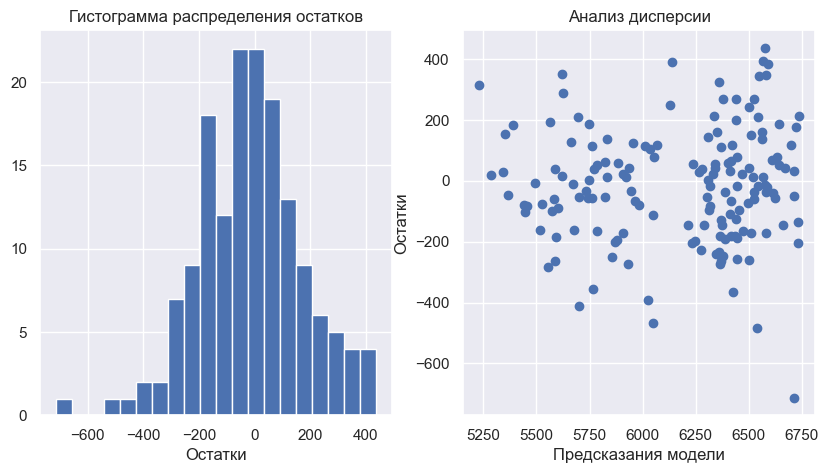

In [1337]:
residuals_3 =  y_test_3 - predictions_3
graphs_for_residuals(predictions_2, residuals_3)

По сравнению с остальными 2 моделями данные остатки показывают более лучший результат. Паттернов в анализе дисперсии не обнаружено, а гистограмма становится более равномерной

In [1338]:
def calculate_metrics(y_true, y_pred):
    """
    Функция вычисляет метрики для оценки качества модели регрессии.

    Аргументы:
    - y_true: Настоящие значения целевой переменной.
    - y_pred: Предсказанные значения целевой переменной.

    Возвращает:
    Словарь, содержащий значения трех метрик: MSE (Mean Squared Error), MAE (Mean Absolute Error) и RMSE (Root Mean Square Error).
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

In [1339]:
print(calculate_metrics(y_test, predictions))
print(calculate_metrics(y_test_2, predictions_2))
print(calculate_metrics(y_test_3, predictions_3))

{'MSE': 43887.015009660514, 'MAE': 164.24194463474927, 'RMSE': 209.4922791170608}
{'MSE': 37030.91131113694, 'MAE': 149.03965222364604, 'RMSE': 192.4341739690145}
{'MSE': 35673.88988618197, 'MAE': 146.16302445362325, 'RMSE': 188.87532895055926}


- Метрика MSE (Mean Squared Error) измеряет среднюю ошибку квадрата между предсказанными значениями и фактическими значениями. Чем меньше значение MSE, тем лучше модель. Для первой модели MSE равно 43887.015009660514. Для второй 137030.91131113694 и для третьей 35673.88988618197

Метрика MAE (Mean Absolute Error) измеряет среднюю абсолютную ошибку между предсказанными значениями и фактическими значениями. Снова, чем меньше значение MAE, тем лучше. Для первой модели MAE равно 1164.24194463474927, для второй 149.03965222364604 и для третьтей 146.16302445362325.

Метрика RMSE (Root Mean Squared Error) измеряет среднеквадратичную ошибку между предсказанными значениями и фактическими значениями. Она является квадратным корнем из MSE. Чем меньше значение RMSE, тем лучше. Для первой модели RMSE равно 209.4922791170608, для второй 192.4341739690145 и для третьей 188.87532895055926

Сравнивая значения метрик для каждой модели, можно сделать вывод о том, что третья модель имеет наилучшие показатели по всем трем метрикам. Ее значения MSE, MAE и RMSE являются наименьшими среди всех представленных моделей. Таким образом, третья модель считается самой лучшей с точки зрения этих метрик.

Сделаем предсказания для заказчика 

Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стад. По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.

In [1340]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


In [1344]:
df_aggregated = (df_ferma_main.groupby(['Тип пастбища', 'Порода'])
.agg({'СПО (Сахаро-протеиновое соотношение)':'mean', 'ЭКЕ (Энергетическая кормовая единица)' :'mean', 'Сырой протеин, г':'mean'})
.reset_index())

Расчитаем средние значения по типу пастбища и породе. Идеальным решением было бы уточнить узаказчика по какому принципу для той или иной коровы расчитывается корм, но так как такой возожности нет - можно предположить, что расчет происходит в зависимости от типа пастбища и породы. 
После расчета добавим данные в нашу таблицу и умножим на 1.05

In [1345]:
df_aggregated

,Тип пастбища,Порода,СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,Равнинное,Вис Бик Айдиал,0.909305,14.328342,1903.743316
1,Равнинное,РефлешнСоверинг,0.914176,14.564835,1921.087912
2,Холмистое,Вис Бик Айдиал,0.913595,14.562162,1941.702703
3,Холмистое,РефлешнСоверинг,0.916212,14.774545,1927.800000


In [1346]:
df_cow_buy['Тип пастбища'] = df_cow_buy['Тип пастбища'].str.capitalize()

In [1347]:
df_cow_buy = df_cow_buy.merge(df_aggregated, on=['Тип пастбища', 'Порода'], how='left')

In [1348]:
df_cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.913595,14.562162,1941.702703
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.909305,14.328342,1903.743316
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.914176,14.564835,1921.087912
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.916212,14.774545,1927.800000
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.914176,14.564835,1921.087912
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,0.914176,14.564835,1921.087912
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,0.909305,14.328342,1903.743316
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,0.916212,14.774545,1927.800000
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,0.913595,14.562162,1941.702703
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,0.914176,14.564835,1921.087912


In [1349]:
name_list  = ['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г']

for name in name_list:
    df_cow_buy[name] = df_cow_buy[name].multiply(1.05)

Сделаем из СПО категориальную переменную, а ЭКЕ возведем в квадрат 

In [1350]:
nonlinear_threshold = 0.91 
df_cow_buy['СПО_categorical'] = (df_cow_buy['СПО (Сахаро-протеиновое соотношение)']
                                    .apply(lambda x: '<=_0.91' if x <= nonlinear_threshold else '>_0.91'))
df_cow_buy['ЭКЕ^2'] = df_cow_buy['ЭКЕ (Энергетическая кормовая единица)'] ** 2
warnings.filterwarnings('ignore')

df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО_categorical,ЭКЕ^2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.959274,15.290270,2038.787838,>_0.91,233.792365
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.954770,15.044759,1998.930481,>_0.91,226.344784
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.962023,15.513273,2024.190000,>_0.91,240.661631
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202


Добавим параметр возраст. Идеальным было бы запросить у заказчика данные о возрасте. Но такой возможности нет. Можно предположить, раз заказчик покупает нновых буренок, то это молодые буренки, то есть возраста меньше 2х лет. 

In [1351]:
df_cow_buy['Возраст'] = 'менее_2_лет'
df_cow_buy.head()


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО_categorical,ЭКЕ^2,Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.959274,15.290270,2038.787838,>_0.91,233.792365,менее_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.954770,15.044759,1998.930481,>_0.91,226.344784,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202,менее_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.962023,15.513273,2024.190000,>_0.91,240.661631,менее_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202,менее_2_лет


Сделаем новый порядок колонок в нашем датафрейме. 

In [1353]:
new_order = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода', 'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%', 'Возраст', 'СПО_categorical', 'ЭКЕ^2', 'Имя Папы']
df_cow_buy = df_cow_buy.reindex(columns=new_order)
df_cow_buy.head()
df_cow_buy_copy = df_cow_buy.copy()

Сделаем кодировку и стандартизация наших параметров. И предскажем удорй для коров, которые хочет купить заказчик. 

In [1354]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 
                   'СПО (Сахаро-протеиновое соотношение)']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 
                 'СПО_categorical', 'Имя Папы']
num_col_names = ['ЭКЕ^2', 'Сырой протеин, г']

encoder = encoder3 
df_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder3.get_feature_names()
scaler = scaler3 
df_cow_buy_scaled = scaler.fit_transform(df_cow_buy[num_col_names])
df_cow_buy_ohe = pd.DataFrame(df_cow_buy_ohe, columns=encoder_col_names)
df_cow_buy_scaled = pd.DataFrame(df_cow_buy_scaled, columns=num_col_names)
df_cow_buy = pd.concat([df_cow_buy_ohe, df_cow_buy_scaled], axis=1)
predictions = model_lr_3.predict(df_cow_buy)




In [1355]:
df_cow_buy_copy["Удой (предсказание модели)"] = predictions
df_cow_buy_copy.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО_categorical,ЭКЕ^2,Имя Папы,Удой (предсказание модели)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286
1,15.044759,1998.930481,0.954770,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,>_0.91,226.344784,Буйный,5906.029745
2,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,менее_2_лет,>_0.91,233.878202,Барин,5965.316286
3,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658
4,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,менее_2_лет,>_0.91,233.878202,Буйный,6223.462577


## Шаг 6. Логистическая регрессия

Сделаем кодировку, стандартизация параметров и обучим модель логистической регресии. Нша модель будет определть вкус молока. Для этого будем использовать следующие признаки: СПО, возраст, порода, тип пастбища, порода папы быка, имя папы, ЭКЕ, сырой протеин, жирность и белок.

К прзнакам, которые использовались в линейной регресии также еще добавились жирность и белок - параметры самого молока. Поскольку  эти параметры влияют на вкус так же как и питание, порода и остальные факторы. 

In [1358]:
columns_to_drop = ['Вкус молока', 'Удой, кг', 'id', 
                   'СПО (Сахаро-протеиновое соотношение)']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 
                 'СПО_categorical', 'Имя Папы']
num_col_names = ['ЭКЕ^2', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']

In [1359]:
RANDOM_STATE = 42
X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['Вкус молока']
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE) 

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)




Accuracy: 0.6305732484076433
Recall: 0.8636363636363636
Precision: 0.6229508196721312


Text(47.25, 0.5, 'True Label')

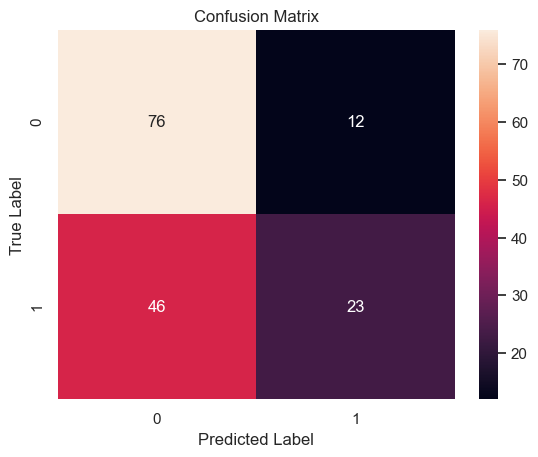

In [1360]:

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, pos_label='вкусно')
precision = precision_score(y_test, predictions, pos_label='вкусно')
confusion_mtx = confusion_matrix(y_test, predictions)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
sns.heatmap(confusion_mtx, annot=True) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

1. Accuracy (точность) равна 0.6305732484076433, что означает, что модель правильно классифицирует примерно 63% образцов. Однако, стоит отметить, что точность сама по себе не является достаточной для полной оценки модели, особенно в случае с несбалансированными классами.

2. Recall (полнота) составляет 0.8636363636363636, что указывает на то, что модель способна обнаруживать примерно 86% положительных случаев из всех истинных положительных случаев. В данном контексте это может быть полезным, если мы заинтересованы в максимальной возможности обнаружить положительные случаи.

3. Precision (точность) составляют 0.6229508196721312, что означает, что около 62% предсказанных моделью положительных случаев действительно являются истинными положительными случаями. Более высокое значение этой метрики означает, что модель допускает меньше ложных положительных предсказаний.

4. Матрица ошибок (confusion matrix) для логистической регрессии представляет собой таблицу, которая показывает количество верно и неверно классифицированных примеров каждого класса в задаче классификации.

В матрице ошибок размером 2x2, значения означают следующее:

Верно классифицированные положительные примеры (True Positives, TP): 76
Неверно классифицированные отрицательные примеры (False Negatives, FN): 12
Неверно классифицированные положительные примеры (False Positives, FP): 46
Верно классифицированные отрицательные примеры (True Negatives, TN): 23

С учетом наших метрик, ложно-отрицательная ошибка будет критичнее при покупке коров относительно вкуса молока. Ложно-отрицательная ошибка возникает, когда модель относит вкусное молоко к невкусным. Поскольку мы предполагаем, что потребители ценят вкусное молоко, отсутствие его определения может привести к снижению качества продукции и недовольству клиентов.

Ложно-положительная ошибка возникает, когда модель относит невкусное молоко к вкусному. Хотя такая ошибка может привести к потере некоторого количества сбыта, она в меньшей степени влияет на качество продукции и удовлетворенность клиентов, чем пропущенные вкусные образцы.

Таким образом, при покупке коров относительно вкуса молока, ложно-отрицательная ошибка является более критичной из-за потенциального негативного влияния на качество продукции и удовлетворенность клиентов.

In [1361]:
columns_to_drop = ['СПО (Сахаро-протеиновое соотношение)', 'Удой (предсказание модели)']
cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 
                 'СПО_categorical', 'Имя Папы']
num_col_names = ['ЭКЕ^2', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']

In [1362]:
df_cow_buy_copy_2 = df_cow_buy_copy.copy()

In [1363]:
df_cow_buy_copy_2.columns

Index(['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г',
       'СПО (Сахаро-протеиновое соотношение)', 'Порода', 'Тип пастбища',
       'Порода папы быка', 'Жирность,%', 'Белок,%', 'Возраст',
       'СПО_categorical', 'ЭКЕ^2', 'Имя Папы', 'Удой (предсказание модели)'],
      dtype='object')

In [1364]:
df_cow_buy_copy = df_cow_buy_copy.drop(columns_to_drop, axis=1)
df_cow_ohe = encoder.transform(df_cow_buy_copy[cat_col_names])

encoder_col_names = encoder.get_feature_names()
df_cow_scaled = scaler.transform(df_cow_buy_copy[num_col_names])

df_cow_ohe = pd.DataFrame(df_cow_ohe, columns=encoder_col_names)
df_cow_scaled = pd.DataFrame(df_cow_scaled, columns=num_col_names)

df_cow_buy_copy = pd.concat([df_cow_ohe, df_cow_scaled], axis=1)


predictions = clf.predict(df_cow_buy_copy)


In [1366]:
df_cow_buy_copy_2['Вкус молока(предказние модели)'] = predictions

In [1367]:
df_cow_buy_copy_2.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО_categorical,ЭКЕ^2,Имя Папы,Удой (предсказание модели),Вкус молока(предказние модели)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286,вкусно
1,15.044759,1998.930481,0.954770,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,>_0.91,226.344784,Буйный,5906.029745,вкусно
2,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,менее_2_лет,>_0.91,233.878202,Барин,5965.316286,вкусно
3,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658,не вкусно
4,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,менее_2_лет,>_0.91,233.878202,Буйный,6223.462577,вкусно


In [1368]:
filtered_df = (df_cow_buy_copy_2[(df_cow_buy_copy_2['Удой (предсказание модели)'] >= 6000) 
                                 & (df_cow_buy_copy_2['Вкус молока(предказние модели)'] == 'вкусно')])


In [1369]:
filtered_df

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО_categorical,ЭКЕ^2,Имя Папы,Удой (предсказание модели),Вкус молока(предказние модели)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286,вкусно
4,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,менее_2_лет,>_0.91,233.878202,Буйный,6223.462577,вкусно
7,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.079,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658,вкусно
11,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.42,3.075,менее_2_лет,>_0.91,233.792365,Барин,6078.594440,вкусно
13,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.079,менее_2_лет,>_0.91,233.792365,Соловчик,6103.278849,вкусно
